In [1]:
%matplotlib inline
import pycircos
import matplotlib.pyplot as plt
import pandas as pd
import joblib
model = joblib.load('/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/data/model_D1.pkl')


/home/lxm/.conda/envs/mine39/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SelectKBest from version 1.3.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/lxm/.conda/envs/mine39/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RobustScaler from version 1.3.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/lxm/.conda/envs/mine39/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ElasticNet from version 1.3.0 when using version 1

# load data

In [2]:
import numpy as np
import pandas as pd
from nilearn.connectome import vec_to_sym_matrix
brain_label = pd.read_csv('/mnt/lxm/lxm/post_braincord/scripts/5post_stats/masks/MIST_122/MIST_122.csv')['label'].values
network = pd.read_csv('/mnt/lxm/lxm/post_braincord/scripts/5post_stats/masks/MIST_122/MIST_122.csv')['network'].values
# brain_label = pd.read_csv('/mnt/lxm/lxm/post_braincord/scripts/5post_stats/masks/MIST_122/MIST_122_yeo_9network.csv')['yeo_network'].values
spinal_label = spinal_label = ['C'+str(j)+'_'+i for j in range(1, 8) for i in ['D','V']]
labels = list(brain_label)+['PAG','rvm','whole_grey'] + list(spinal_label)
networks = list(network)+['PAG','rvm','whole_grey'] + list(spinal_label)

featuremask = model.named_steps['fsel'].get_support()
# 获得连接权重
def get_weights(model, labels=labels, ):
    RES = np.zeros(int(len(labels)*(len(labels)-1)/2))

    featuremask = model.named_steps['fsel'].get_support()
    RES[featuremask] = model.named_steps['model'].coef_.flatten()
    
    print(np.sum(model.named_steps['model'].coef_!=0))
    
    RES_MAT = vec_to_sym_matrix(RES, diagonal=np.repeat(0, len(labels)))
    return RES_MAT

res_mat = get_weights(model)

id_A = np.where(res_mat)[0]
id_B = np.where(res_mat)[1]
reg_A = [labels[x] for x in np.where(res_mat)[0]]
reg_B = [labels[x] for x in np.where(res_mat)[1]]

reg_A_net = [networks[x] for x in np.where(res_mat)[0]]
reg_B_net = [networks[x] for x in np.where(res_mat)[1]]

weights = [x for x in res_mat[np.where(res_mat)]]

bc_weight = pd.DataFrame({'id_A': id_A,
                        'id_B': id_B,
                        'reg_A': reg_A,
                        'reg_A_net': reg_A_net,
                        'reg_B': reg_B,
                        'reg_B_net': reg_B_net,
                        'weights': weights})
bc_weight['abs_weights'] = bc_weight['weights'].abs()
bc_weight = bc_weight.sort_values('abs_weights', ascending=False)
bc_weight = bc_weight.reset_index()
bc_weight = bc_weight[bc_weight.index % 2 !=0]
bc_weight = bc_weight.reset_index()
# bc_weight.to_csv('/mnt/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/results_1108/bc_weight.csv', index=False)

bc_weight.to_csv('/mnt/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/results_1108/bc_weight.csv', index=False)

29


In [3]:
temp = pd.DataFrame({
    'name': np.array(['FPnet','VATTnet_SALnet', 'LIMnet','DMnet_l',
                      'DMnet_pm', 'AUDnet_PINS','MOTnet', 'DMnet_am_lhAG','VISnet'
       ,   'VVIS_DVIS',
       'PAG', 'CER','C1_D','C3_D', 'C3_V', 'C4_V', 'C5_V',  ],
      dtype=object)})
regs = np.concatenate((bc_weight['reg_A'].values,bc_weight['reg_B'].values))
nets = np.concatenate((bc_weight['reg_A_net'].values,bc_weight['reg_B_net'].values))
dict_net = {}
for net in temp['name']:
    temp_arry = []
    for i,val in enumerate(np.unique(regs[np.where(nets==net)[0]])):
        temp_arry.append((val,i+1))
    dict_net[net] = temp_arry
long = []
for val in temp['name']:
    long.append(len(dict_net[val]))
temp['start'] = np.repeat(1,len(long))
temp['end'] = long

In [4]:
temp.to_csv('/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/fig_cir/genral.csv',index=False)
aaaa = np.zeros((29,6),dtype=object)
for i in range(29):
    bc_weight.loc[i,'reg_A_net']
    for ii in dict_net[bc_weight.loc[i,'reg_A_net']]:
        if ii[0] == bc_weight.loc[i,'reg_A']:
            break
    aaaa[i,0] = bc_weight.loc[i,'reg_A_net']
    aaaa[i,1] = (ii[1]-1)*1000+300
    aaaa[i,2] = (ii[1]-1)*1000+300+int(round(bc_weight['abs_weights']*1000)[i])*3
    bc_weight.loc[i,'reg_B_net']
    for ii in dict_net[bc_weight.loc[i,'reg_B_net']]:
        if ii[0] == bc_weight.loc[i,'reg_B']:
            break
    aaaa[i,3] = bc_weight.loc[i,'reg_B_net']
    aaaa[i,4] = (ii[1]-1)*1000+300
    aaaa[i,5] = (ii[1]-1)*1000+300+int(round(bc_weight['abs_weights']*1000)[i])*3
    
data_links = pd.DataFrame(aaaa,columns=['net1','start1','end1','net2','start2','end2'])
colors = []
# for i in bc_weight['weights']:
#     if i > 0:
#         colors.append('#D00A07')
#     else:
#         colors.append('royalblue')
def weight_to_color(weight):
    if weight > 0:
        # Shades of red for positive weights
        return plt.cm.Reds(weight / max_weight)
    elif weight < 0:
        # Shades of blue for negative weights
        return plt.cm.Blues(abs(weight) / max_weight)
    else:
        return '#FFFFFF'  # White for zero weight

# Normalize weights for color depth
max_weight = bc_weight['weights'].abs().max()

# Apply the function to generate colors
colors = bc_weight['weights'].apply(weight_to_color).tolist()


data_links['color'] = colors
data_links.to_csv('/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/fig_cir/data_links.csv',index=False)

# plot

In [5]:
#Set chromosomes
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle
circle = Gcircle(figsize=(8,8)) 
with open('/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/fig_cir/genral.csv') as f:
    f.readline()
    for line in f:
        line   = line.rstrip().split(",") 
        name   = line[0]
        length = int(line[-1])*1000
        arc    = Garc(arc_id=name, size=length, interspace=2, raxis_range=(935,985), labelposition=150, label_visible=True,
                      labelsize=18)
        
        circle.add_garc(arc) 

<Figure size 800x800 with 0 Axes>

In [6]:
circle.set_garcs(-115,245) 
for arc_id in circle.garc_dict:
    circle.tickplot(arc_id, raxis_range=(985,1000), tickinterval=1000, ticklabels=None,ticklabelsize=20) 


In [8]:
#linkplot
#heatmap
import collections
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open("/home/lxm/lxm/post_braincord/scripts/5post_stats/1_all_analysis/validation_b_bs/fig_cir/data_links.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name1  = line[0]     
        start1 = int(line[1])-1
        end1   = int(line[2])
        name2  = line[3]     
        start2 = int(line[4])-1
        end2   = int(line[5])
        source = (name1, start1, end1, 615)
        destination = (name2, start2, end2, 615)
        # circle.chord_plot(source, destination, facecolor=circle.garc_dict[name1].facecolor,edgecolor=line[-1], linewidth=1)
        circle.chord_plot(source, destination, 
                          facecolor=tuple(map(float,''.join(line[-4:]).replace('"', '').replace('(', '').replace(')', '').split(' '))),
                          edgecolor=tuple(map(float,''.join(line[-4:]).replace('"', '').replace('(', '').replace(')', '').split(' '))),
                          linewidth=2)

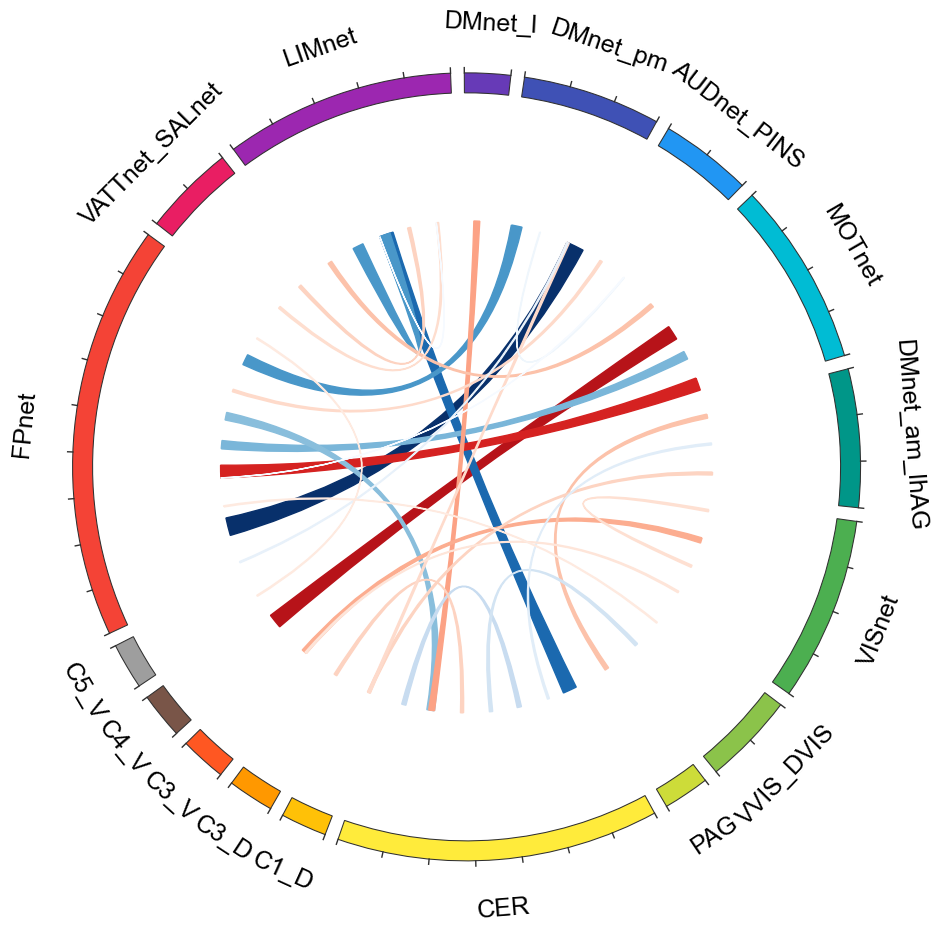

In [9]:
circle.figure